In [1]:
import numpy as np
from scipy import stats

import pymc3 as pm

import arviz as az
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Data

In [2]:
data = stats.bernoulli(.7).rvs(100)

## Prior

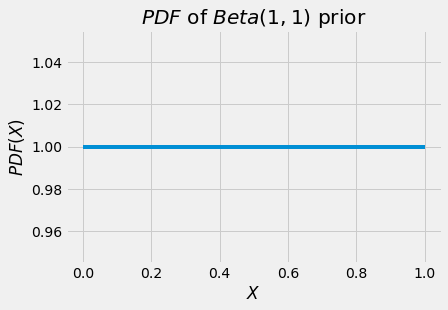

In [3]:
# Prior
prior = stats.beta(a=1, b=1)

# Plot prior
x = np.arange(0, 1.01, .01)
prior_pdf = prior.pdf(x)

plt.plot(x, prior_pdf)
plt.xlabel('$X$')
plt.ylabel('$PDF(X)$')
plt.title('$PDF$ of $Beta(1, 1)$ prior')
plt.show()

In [4]:
# Instantiate PyMC3 model
with pm.Model() as model:
    
    # Specify the prior over an unknown parameter
    theta = pm.Beta('theta', alpha=1, beta=1)
    
    # Specify the likelihood and condition on observed data
    y_obs = pm.Binomial('y_obs', n=1, p=theta, observed=data)
    
    # Sample from the posterior
    inference_data = pm.sample(1000, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 47 seconds.


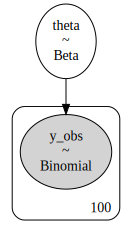

In [5]:
# Visualoze the model
pm.model_to_graphviz(model)

In [6]:
# Sample predictive distributions
pred_distrs = (
    pm.sample_prior_predictive(1000, model)['y_obs'],
    pm.sample_posterior_predictive(inference_data, 1000, model)['y_obs']
)

C:\Users\aleks\anaconda3\envs\tfp-pymc3\lib\site-packages\pymc3\sampling.py:1689: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


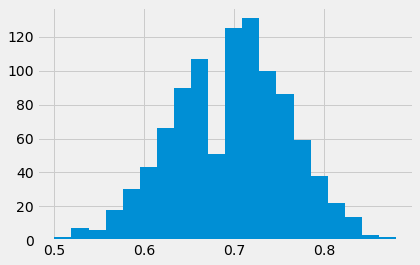

In [7]:
plt.hist(pred_distrs[1].mean(axis=1), bins=20)
plt.show()